In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img_path = 'C:\\Users\\HP\\Desktop\\worksapces\\image-editing\\images\\cartoon2.jpg' 
img = cv2.imread(img_path)

In [59]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th3 = cv2.adaptiveThreshold(img_grey,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,20)

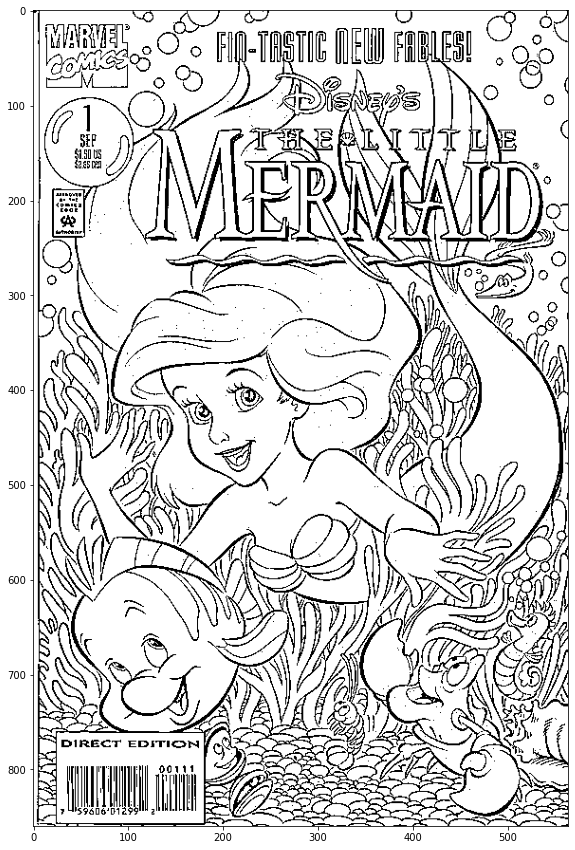

In [60]:
plt.figure(figsize=(10,15))
plt.imshow(th3, 'gray')

In [61]:
import easyocr
reader = easyocr.Reader(['en'])
readtext_result = reader.readtext(th3, min_size = 5)

In [62]:
readtext_result

[([[9, 11], [85, 11], [85, 47], [9, 47]], 'MARM', 0.6988318562507629),
 ([[193, 27], [205, 27], [205, 55], [193, 55]], 'l', 0.172253910586452),
 ([[228, 14], [470, 14], [470, 62], [228, 62]],
  '-TAGTIC IEI arleb?',
  0.10406722436817104),
 ([[258, 122], [322, 122], [322, 154], [258, 154]], '#Z', 0.08175628508621412),
 ([[124, 124], [408, 124], [408, 250], [124, 250]], 'MERM', 0.914046585559845),
 ([[29, 767], [95, 767], [95, 781], [29, 781]], 'DIRECT', 0.9820412398416579),
 ([[99, 767], [177, 767], [177, 781], [99, 781]],
  'EDITION',
  0.9920064887158191),
 ([[28, 794], [84, 794], [84, 844], [28, 844]], 'IL', 0.28012452406928384),
 ([[119, 787], [183, 787], [183, 855], [119, 855]], 'Im', 0.42386653808557845)]

In [65]:
box_list=[]
box_list.extend(row[0] for row in readtext_result)

In [69]:
dst = cv2.inpaint(th3, mask, 7, cv2.INPAINT_NS)

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\photo\src\inpaint.cpp:760: error: (-209:Sizes of input arguments do not match) All the input and output images must have the same size in function 'icvInpaint'


In [ ]:
import easyocr
import cv2
import os
import matplotlib.pyplot as plt
import math
import numpy as np

image_path ='C:\\Users\\HP\\Desktop\\worksapces\\image-editing\\images'
image_src = 'cartoon2.jpg'
full_path = os.path.join(image_path, image_src)

reader = easyocr.Reader(['en'])

def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)

def inpaint_text(img_path):
    # read image
    img_array = np.fromfile(img_path, np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
    
    # generate (word, box) tuples 
    readtext_result = reader.readtext(img, min_size = 7)
    mask = np.zeros(img.shape[:2], dtype="uint8")
    box_list=[]
    box_list.extend(row[0] for row in readtext_result)
    
    for box in box_list:
        x0, y0 = box[0]
        x1, y1 = box[2]
        x2, y2 = box[1]
        x3, y3 = box[3] 
        
        x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
        x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
        
        thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))
        
        cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255,    
        thickness)
        img = cv2.inpaint(img, mask, 10, cv2.INPAINT_NS)
                 
    return(img)

In [ ]:

img_inpainted = inpaint_text(full_path)
plt.imshow(BGR2RGB(img_inpainted))

In [70]:
import pytesseract
from pytesseract import Output
results = pytesseract.image_to_data(th3, output_type=Output.DICT)

In [73]:
results['text']

['',
 '',
 '',
 '',
 '|;',
 'at',
 'ad',
 '[ov',
 'Of',
 'Vv',
 'COC',
 'O¢',
 '',
 'eg',
 'O',
 'o',
 'FIQ-TASTIE',
 'MEW',
 'FABLES!',
 '~SQ%',
 '',
 '8',
 '©',
 'Alera',
 '\\',
 'x',
 '',
 '',
 '',
 '   ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 '=',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 'be',
 '',
 'I',
 '',
 'ime',
 '',
 'Be',
 '',
 'al',
 '',
 'ie',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 '']

https://pyimagesearch.com/2018/08/20/opencv-text-detection-east-text-detector/
https://blog.naver.com/samsjang/220507996391